In [1]:
using LinearAlgebra

In [2]:
points = [(-1, 0.038), (-0.8, 0.058), (-0.60, 0.10), (-0.4, 0.20),(-0.2,0.03),(0,0.5) ]
k = length(points)
n = 3*(k-1)


15

In [3]:
# matrix A, n*n
A = zeros(n,n)
# vector b, n*1
B = zeros(n)

15-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [4]:
# Fill in the system with interpolation equations
for i in 1:(k-1)
    # t1 and t2 are the time points (t-values) for each quadratic
    t1 = points[i][1]    # First point of the i-th interval
    t2 = points[i+1][1]  # Second point of the i-th interval

    # Equation at t1 for quadratic i (first equation for the i-th quadratic)
    A[2*(i-1) + 1, 3*(i-1) + 1] = 1  # a_i coefficient
    A[2*(i-1) + 1, 3*(i-1) + 2] = t1    # b_i coefficient
    A[2*(i-1) + 1, 3*(i-1) + 3] = t1^2      # c_i coefficient
    # Set right-hand side (value of the function at t1)
    B[2*(i-1) + 1] = points[i][2]         # y(t1)

    # Equation at t2 for quadratic i (second equation for the i-th quadratic)
    A[2*(i-1) + 2, 3*(i-1) + 1] = 1 # a_i coefficient
    A[2*(i-1) + 2, 3*(i-1) + 2] = t2    # b_i coefficient
    A[2*(i-1) + 2, 3*(i-1) + 3] = t2^2       # c_i coefficient
    # Set right-hand side (value of the function at t2)
    B[2*(i-1) + 2] = points[i+1][2]       # y(t2)

end


In [5]:
A

15×15 Matrix{Float64}:
 1.0  -1.0  1.0   0.0   0.0  0.0   0.0  …  0.0   0.0  0.0   0.0   0.0  0.0
 1.0  -0.8  0.64  0.0   0.0  0.0   0.0     0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  0.0   1.0  -0.8  0.64  0.0     0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  0.0   1.0  -0.6  0.36  0.0     0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   1.0     0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   1.0  …  0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   0.0     1.0  -0.4  0.16  0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   0.0     1.0  -0.2  0.04  0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   0.0     0.0   0.0  0.0   1.0  -0.2  0.04
 0.0   0.0  0.0   0.0   0.0  0.0   0.0     0.0   0.0  0.0   1.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   0.0  …  0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   0.0     0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  0.0   0.0   0.0  0.0   0.0     0.0   0.0  0.0   0.0   0.0  0.0
 

In [6]:
# inbetween the points
inbetween_points = points[2:end]

5-element Vector{Tuple{Real, Float64}}:
 (-0.8, 0.058)
 (-0.6, 0.1)
 (-0.4, 0.2)
 (-0.2, 0.03)
 (0, 0.5)

In [7]:
# smoothness condition
for i in 1:length(inbetween_points)-1
    t1 = inbetween_points[i][1]
    
    
    c1 = 2*t1 
    b1 = 1
    b2 = -1
    c2 = -2*t1
    # calculate the index of the row
    row = 2*(k-1) + (i)
    
    A[row, 3*(i-1) + 2] = b1
    A[row, 3*(i-1) + 3] = c1
    A[row, 3*(i) + 2] = b2
    A[row, 3*(i) + 3] = c2
end

In [8]:
A

15×15 Matrix{Float64}:
 1.0  -1.0   1.0   0.0   0.0   0.0   …  0.0   0.0   0.0   0.0   0.0  0.0
 1.0  -0.8   0.64  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   1.0  -0.8   0.64     0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   1.0  -0.6   0.36     0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0   …  0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      1.0  -0.4   0.16  0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      1.0  -0.2   0.04  0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   1.0  -0.2  0.04
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   1.0   0.0  0.0
 0.0   1.0  -1.6   0.0  -1.0   1.6   …  0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   1.0  -1.2      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0  -1.0   0.8   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.

In [9]:
# for s'' = 0 2C3 = 0
A[end, 3] = 2

2

In [10]:
# solve the linear system
# F = lu(A)
# x = F\b
x = A\B

15-element Vector{Float64}:
  0.1380000000000001
  0.10000000000000009
  0.0
  0.4899999999999999
  0.9799999999999996
  0.5499999999999997
  0.6160000000000021
  1.4000000000000075
  0.9000000000000061
 -0.7519999999999991
 -5.4399999999999995
 -7.650000000000002
  0.5
  7.08
 23.65

In [11]:
f(a,b,c) = x->a + b*x + c*x^2

f (generic function with 1 method)

In [12]:
# generate a function 
list_funcs = []
for i in 1:3:length(x)
    a = x[i]
    b = x[i+1]
    c = x[i+2]
    f1 = f(a,b,c)
    push!(list_funcs, f1)
end

In [13]:
# now plot the quadratic functions
using Plots

In [14]:
x_values = [x[1] for x in points ]
y_values = [x[2] for x in points ]

6-element Vector{Float64}:
 0.038
 0.058
 0.1
 0.2
 0.03
 0.5

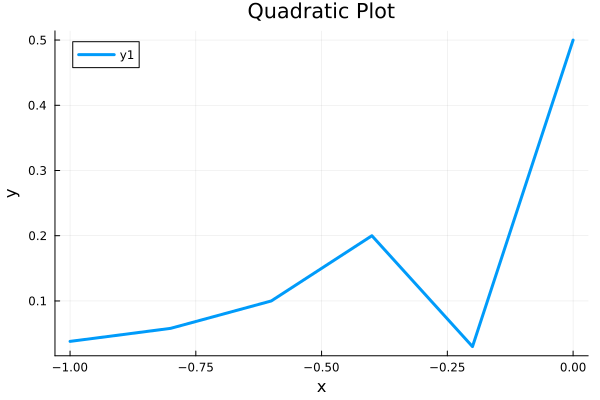

In [15]:
plot(x_values, y_values,  xlabel="x", ylabel="y", title="Quadratic Plot", lw=3)


In [16]:
for i in 1:length(list_funcs)
    f1 = list_funcs[i]
    x_values = [points[i][1], points[i+1][1]]
    y_values = [f1(x) for x in x_values]
    plot!(x_values, y_values, lw=3)
end

In [17]:
function get_function_index(x)
    for i in 1:length(points)-1
        if x >= points[i][1] && x <= points[i+1][1]
            return i
        end
    end
    return -1
    
end

get_function_index (generic function with 1 method)

In [18]:

x_end = points[end][1]
# generate the random points
x_values_new = collect(range(-1, stop=x_end, length=100))

# check the values of the x to see which quadratic function to use
generated_y = []

for x in x_values_new
    index = get_function_index(x)
    if index == -1
        println("Error")
    end
    f1 = list_funcs[index]
    y = f1(x)
    push!(generated_y, y)
end



In [19]:
x_values_new

100-element Vector{Float64}:
 -1.0
 -0.98989898989899
 -0.9797979797979798
 -0.9696969696969697
 -0.9595959595959596
 -0.9494949494949495
 -0.9393939393939394
 -0.9292929292929293
 -0.9191919191919192
 -0.9090909090909091
  ⋮
 -0.08080808080808081
 -0.0707070707070707
 -0.06060606060606061
 -0.050505050505050504
 -0.04040404040404041
 -0.030303030303030304
 -0.020202020202020204
 -0.010101010101010102
  0.0

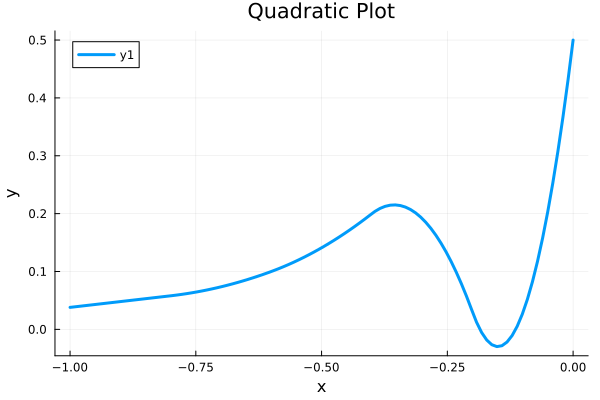

In [20]:
plot(x_values_new, generated_y,  xlabel="x", ylabel="y", title="Quadratic Plot", lw=3)